<a href="https://colab.research.google.com/github/mustufajp/Harry-Potter-Sorting-Hat/blob/main/Harry_Potter_Demo_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
#Credentials
from google.colab import drive
drive.mount('/content/drive')
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

#Data manipulation
import pandas as pd
import numpy as np

#Cleaning & tokenizing data

from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('universal_tagset')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

#Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Embedding
import gensim.downloader
from gensim.models import KeyedVectors
from gensim.downloader import load
from gensim.corpora.wikicorpus import WikiCorpus

#Implementig&testing model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance

#Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Web Scraped Data

In [ ]:
#Scraped the data from harrypotter.fandom.com/ and wizardingworld.com
df_HP = pd.read_csv("/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/Data Frame/original file/web-scraped data.csv")
df_HP.head()

,first_name,last_name,url,personality_traits,Houses,last_name_1,gender,wand,patronus,hair_color,eye_color,loyalty,skills,description,full_description
0,Rowena,Ravenclaw,NaN,NaN,Ravenclaw,Ravenclaw,Female,Unknown,Unknown,Black,Dark,NaN,"Extremely skilled witch, known for her intelli...",A founder of Hogwarts School of Witchcraft and...,A founder of Hogwarts School of Witchcraft an...
1,Igor,Slytherin,NaN,NaN,Slytherin,Karkaroff,Male,Unknown,NaN,Silver| formerly black,NaN,NaN,Skilled in the Dark Arts,Igor Karkaroff was the headmaster of Durmstran...,Igor Karkaroff was the headmaster of Durmstra...
2,Salazar,Slytherin,NaN,NaN,Slytherin,Slytherin,Male,"snakewood, Basilisk horn",Unknown,Grey,Dark,NaN,Accomplished Legilimens and one of the first r...,Salazar Slytherin was one of the four founders...,Salazar Slytherin was one of the four founder...
3,Godric,Gryffindor,NaN,NaN,Gryffindor,Gryffindor,Male,Unknown,Unknown,Red,Green,NaN,The most accomplished duellist of his time,One of the four founders of Hogwarts School of...,One of the four founders of Hogwarts School o...
4,Helga,Hufflepuff,NaN,NaN,Hufflepuff,Hufflepuff,Female,Unknown,Unknown,Brown,Blue,NaN,Food-related Charms. Many traditional Hogwarts...,One of the four founders of Hogwarts School of...,One of the four founders of Hogwarts School o...


#Cleaning Data

## Cleaning Data
Removing stop_words, names, irrelevant keywords, lemmetizing.

In [ ]:
def clean_text(data_type):
    # Initialize stopwords
    stop_words = set(stopwords.words('english'))

    # Add custom stopwords and names to remove
    first_names = df_HP['first_name'].tolist()
    last_names = df_HP['last_name'].tolist()

    redundant_words = ["lord", "voldemort", "hogwarts", "witchcraft", "wizardry", "school","founder" "wizard", "wizarding", "mother", "father","daughter","son","sister", "brother","wa"]

    # Add first and last names to redundant_words
    redundant_words.extend([name.lower() for name in first_names])
    redundant_words.extend([name.lower() + "s" for name in first_names if isinstance(name, str)])
    redundant_words.extend([name.lower() for name in last_names if isinstance(name, str)])
    redundant_words.extend([name.lower() + "s" for name in last_names if isinstance(name, str)])

    # Update stopwords
    stop_words.update(redundant_words)

    lemmatizer = WordNetLemmatizer()

    def lemmatize(sentence):
        # Tokenize the sentence
        tokens = word_tokenize(sentence)

        # Lemmatize tokens and remove stopwords
        filtered_tokens = []
        for word, part_of_speech in pos_tag(tokens):
            # Filter based on POS tags: noun, verb, adjective, adverb
            if part_of_speech in ['NN', 'VBG', 'JJ']:
                # Lemmatize word
                lemma = lemmatizer.lemmatize(word.lower())
                filtered_tokens.append(lemma)

        # Join filtered tokens back into a sentence
        filtered_sentence = ' '.join(filtered_tokens)
        return filtered_sentence

    # Apply lemmatization and filtering to each row of data_type
    filtered_tokens = data_type.apply(lemmatize)

    return filtered_tokens


In [ ]:
cleaned_data=clean_text(df_HP['full_description'])
df_HP["cleaned_description"] = cleaned_data
df_HP=df_HP[df_HP["cleaned_description"]!=""]
df_HP.head()

,first_name,last_name,url,personality_traits,Houses,last_name_1,gender,wand,patronus,hair_color,eye_color,loyalty,skills,description,full_description,cleaned_description
0,Rowena,Ravenclaw,NaN,NaN,Ravenclaw,Ravenclaw,Female,Unknown,Unknown,Black,Dark,NaN,"Extremely skilled witch, known for her intelli...",A founder of Hogwarts School of Witchcraft and...,A founder of Hogwarts School of Witchcraft an...,founder brilliant mind love learning house res...
1,Igor,Slytherin,NaN,NaN,Slytherin,Karkaroff,Male,Unknown,NaN,Silver| formerly black,NaN,NaN,Skilled in the Dark Arts,Igor Karkaroff was the headmaster of Durmstran...,Igor Karkaroff was the headmaster of Durmstra...,headmaster wizarding school everything champio...
2,Salazar,Slytherin,NaN,NaN,Slytherin,Slytherin,Male,"snakewood, Basilisk horn",Unknown,Grey,Dark,NaN,Accomplished Legilimens and one of the first r...,Salazar Slytherin was one of the four founders...,Salazar Slytherin was one of the four founder...,open idea non-magical sending school talented ...
3,Godric,Gryffindor,NaN,NaN,Gryffindor,Gryffindor,Male,Unknown,Unknown,Red,Green,NaN,The most accomplished duellist of his time,One of the four founders of Hogwarts School of...,One of the four founders of Hogwarts School o...,house bold wizard legacy apparent many support...
4,Helga,Hufflepuff,NaN,NaN,Hufflepuff,Hufflepuff,Female,Unknown,Unknown,Brown,Blue,NaN,Food-related Charms. Many traditional Hogwarts...,One of the four founders of Hogwarts School of...,One of the four founders of Hogwarts School o...,loyal heart house result inclusive open approa...


As you can see some words words such as founder still remain.

(if any error with the code or logic please let me know)

#Key Words Selection

We identified the most frequent keywords based on Inverse Document Frequency (IDF) and determined valuable keywords using Term Frequency-Inverse Document Frequency (TF-IDF). Frequency refers to how often a term appears in the descriptions of characters from a specific house. Valuable keywords are those that are unique to a particular house and do not appear in descriptions from other houses.

In [ ]:
def IDF_TFIDF (house_name):
  vectorizer = TfidfVectorizer()
  vectorizer.fit(df_HP["cleaned_description"])
  transformed=vectorizer.transform(df_HP["cleaned_description"][df_HP["Houses"]==house_name])
  np.asarray(transformed.sum(axis=0))[0]
  df_idf_tfidf = pd.DataFrame({"feature": vectorizer.get_feature_names_out(), "idf": vectorizer.idf_ , "tfidf":np.asarray(transformed.sum(axis=0))[0], "Houses":house_name})
  df_idf_tfidf.sort_values("idf", ascending=False)
  return df_idf_tfidf

In [ ]:
g="Gryffindor"
s="Slytherin"
h="Hufflepuff"
r="Ravenclaw"

df_Gryffindor=IDF_TFIDF (g)
df_Slytherin=IDF_TFIDF (s)
df_Hufflepuff=IDF_TFIDF (h)
df_Ravenclaw=IDF_TFIDF (r)

## Plot of the idf vs tf-idf graph

In [ ]:
def plot_idf_tfidf(houses):
    for house in houses:
        df_name = f"df_{house}"
        #converting string to variable using globals()
        if df_name in globals():
            df = globals()[df_name]
            fig = px.scatter(df, x="idf", y="tfidf", hover_data=['feature'], title=house)
            fig.show()
        else:
            print(f"Dataframe for {house} not found in the global namespace.")

# List of houses
houses = [g, s, h, r]

# Call the plotting function
plot_idf_tfidf(houses)

Referring to the graph, we extracted words to compile a list of keywords. However, because certain houses had limited relevant keywords, we supplemented the list with additional synthetic keywords.

## The result of the compilation

In [ ]:
#The result of compilation.
df_keywords = pd.read_csv("/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/Data Frame/IDF_TFIDF data/added_remain_words - remain_words.csv")
df_keywords.head()

,Unnamed: 0,feature,idf,tfidf,Houses
0,209.0,anger,5.409659,4.062068,Gryffindor
1,641.0,brave,5.088075,7.476059,Gryffindor
2,644.0,bravery,5.409659,4.146861,Gryffindor
3,750.0,capable,5.311219,3.971797,Gryffindor
4,761.0,cared,5.481118,3.930246,Gryffindor


# Embedding


In [ ]:
num_dimensions =100
w2v_model = load(f'glove-wiki-gigaword-{num_dimensions}')
# w2v_model = load(f'word2vec-google-news-{num_dimensions}')
# w2v_model = load(f'glove-twitter-{num_dimensions}')

[w2v lists](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

#Embedding: Key words

In [ ]:
#Vectorizing the keywords using w2v model.
df_keywords['embedding'] = df_keywords['feature'].apply(lambda column: w2v_model[column] if column in w2v_model else np.zeros(w2v_model.vector_size))
df_keywords.head()

,Unnamed: 0,feature,idf,tfidf,Houses,embedding
0,209.0,anger,5.409659,4.062068,Gryffindor,"[0.013703, 0.40504, 0.41054, -0.70791, -0.3843..."
1,641.0,brave,5.088075,7.476059,Gryffindor,"[-0.3108, -0.025014, 0.068947, -0.43959, -0.41..."
2,644.0,bravery,5.409659,4.146861,Gryffindor,"[-0.11931, 0.14285, -0.4211, 0.61368, -0.26284..."
3,750.0,capable,5.311219,3.971797,Gryffindor,"[-0.36378, 0.37731, 0.5511, 0.17923, -0.1185, ..."
4,761.0,cared,5.481118,3.930246,Gryffindor,"[0.19414, 1.1417, 0.028085, 0.22355, -0.87542,..."


# Model

In [ ]:
encoder = LabelEncoder()

#Training the model.
X_train=df_keywords["embedding"].to_list()
y_train=encoder.fit_transform(df_keywords["Houses"])

#Multi-class Logistic Regression.
model = LogisticRegression(random_state=42,  multi_class='multinomial', max_iter=500)

model.fit(X_train, y_train)


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

# Questionnaire

In [ ]:
workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/1mCinsJcVzunnc5Fv85KEL2JFDG4RYy0XhECwIOfI7Lo')

sheet = workbook.worksheet('Form Responses 1')
values = sheet.get_all_values()

df_answer = pd.DataFrame(values, columns=values[0])
df_answer.drop(index=0, axis=0, inplace=True)
df_answer.drop(["Timestamp"], axis=1,inplace=True)

#Replacing answers from the questionnaire with a word from the keywords.

df_answer['Which magical creature appeals to you the most?'].replace('Dragon','recklessness', inplace=True)
df_answer['Which magical creature appeals to you the most?'].replace('Phoenix','wisdom', inplace=True)
df_answer['Which magical creature appeals to you the most?'].replace('Basilisk','cunning', inplace=True)
df_answer['Which magical creature appeals to you the most?'].replace('Hippogriff','manner', inplace=True)

df_answer['If you could have any magical ability, what would it be?'].replace('Speaking to animals', 'evil', inplace=True)
df_answer['If you could have any magical ability, what would it be?'].replace('Reading Minds', 'intelligent', inplace=True)
df_answer['If you could have any magical ability, what would it be?'].replace('Flying', 'brave', inplace=True)
df_answer['If you could have any magical ability, what would it be?'].replace('Invisibility ', 'uncomfortable', inplace=True)

df_answer['If you could have dinner with a famous person, alive or dead, who would you chose?'].replace('Nelson Mandela', 'courage', inplace=True)
df_answer['If you could have dinner with a famous person, alive or dead, who would you chose?'].replace('Marie Curie', 'logical', inplace=True)
df_answer['If you could have dinner with a famous person, alive or dead, who would you chose?'].replace('Cleopatra', 'innovative', inplace=True)
df_answer['If you could have dinner with a famous person, alive or dead, who would you chose?'].replace('David Attenborough', 'fairness', inplace=True)

df_answer['How do you approach teamwork?'].replace('Ensure everyone\'s strengths are utilized for success', 'obsession', inplace=True)
df_answer['How do you approach teamwork?'].replace('Emphasize cooperation, support, and inclusivity.', 'friendly', inplace=True)
df_answer['How do you approach teamwork?'].replace('Take charge and lead by example','outgoing', inplace=True)
df_answer['How do you approach teamwork?'].replace('Value everyone\'s input and focus on shared knowledge', 'rational', inplace=True)

df_answer['What\'s your favourite way to spend free time?'].replace('Adventurous activities and seeking excitement.', 'capable', inplace=True)
df_answer['What\'s your favourite way to spend free time?'].replace('Engaging in strategic or competitive pursuits', 'sadistic', inplace=True)
df_answer['What\'s your favourite way to spend free time?'].replace('Reading, learning, and exploring new ideas','sincere',inplace=True)
df_answer['What\'s your favourite way to spend free time?'].replace('Spending time with friends and enjoying simple pleasures', 'caring', inplace=True)

df_answer['What is your greatest fear?'].replace('Betrayal or the breakdown of relationships', 'honest', inplace=True)
df_answer['What is your greatest fear?'].replace('Ignorance or not reaching your full potential', 'creative', inplace=True)
df_answer['What is your greatest fear?'].replace('Failure or letting others down','altruistic',inplace=True)
df_answer['What is your greatest fear?'].replace('Being overlooked or underestimated', 'arrogant', inplace=True)

df_answer['What is your preferred method of learning?'].replace('hands-on experiences', 'confrontation', inplace=True)
df_answer['What is your preferred method of learning?'].replace('collaboration and group activities', 'wit', inplace=True)
df_answer['What is your preferred method of learning?'].replace('books and research','cheerful',inplace=True)
df_answer['What is your preferred method of learning?'].replace('real-world application', 'bully', inplace=True)

df_answer['Your are going on Holiday. When are you making plans?'].replace('I am not. I will go with the flow.', 'spontaneous', inplace=True)
df_answer['Your are going on Holiday. When are you making plans?'].replace('After I have done extensive research', 'artistic', inplace=True)
df_answer['Your are going on Holiday. When are you making plans?'].replace('I look for the most luxurious accommodations and chill','serious',inplace=True)
df_answer['Your are going on Holiday. When are you making plans?'].replace('I\'d start by considering the preferences and interests of everyone involved', 'eager', inplace=True)

df_answer['If you had the Invisibility Cloak for a day, how would you use it?'].replace('Sneak into forbidden places', 'bravery', inplace=True)
df_answer['If you had the Invisibility Cloak for a day, how would you use it?'].replace('Gather information discreetly for personal gain', 'prejudiced', inplace=True)
df_answer['If you had the Invisibility Cloak for a day, how would you use it?'].replace('positively impact those around you without expecting anything in return.','eccentric',inplace=True)
df_answer['If you had the Invisibility Cloak for a day, how would you use it?'].replace('uncover forgotten knowledge within the castle.', 'memory', inplace=True)

df_answer['You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?'].replace('Taking a step back, I\'d observe the dragon\'s behavior, analyze its characteristics and try to understand it\'s intention', 'creative', inplace=True)
df_answer['You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?'].replace('Offering the dragon something of value might help create a positive interaction and allow us to continue on our journey without harm', 'respected',inplace=True)
df_answer['You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?'].replace('I\'d take the lead, ready to fight for my friends if necessary.','adaptable',inplace=True)
df_answer['You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?'].replace('I\'ll plan an alternative route', 'traitor', inplace=True)



In [ ]:
df_answer.head()

,What's your favourite way to spend free time?,How do you approach teamwork?,What is your greatest fear?,Which magical creature appeals to you the most?,What is your preferred method of learning?,"If you could have any magical ability, what would it be?",Your are going on Holiday. When are you making plans?,"If you had the Invisibility Cloak for a day, how would you use it?",You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?,"If you could have dinner with a famous person, alive or dead, who would you chose?",What's your name?
1,capable,friendly,altruistic,manner,confrontation,evil,spontaneous,bravery,respected,fairness,Alice
2,caring,obsession,creative,recklessness,confrontation,intelligent,spontaneous,bravery,adaptable,courage,Harryyyyy
3,caring,obsession,honest,wisdom,confrontation,intelligent,spontaneous,memory,traitor,courage,Doi
4,sadistic,rational,creative,recklessness,confrontation,brave,serious,bravery,adaptable,innovative,Patrick
5,caring,rational,creative,wisdom,bully,intelligent,spontaneous,bravery,adaptable,innovative,Andrius


# Embedding Questionaire

In [ ]:
#Embedding each keyword and calculating the average vector of each respondent's response.
df_answer["concat"]=df_answer.drop("What's your name?", axis=1).apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_answer["embedding"] = df_answer["concat"].apply(lambda sentence: [w2v_model[word] if word in w2v_model else np.empty(num_dimensions) for word in sentence.split()])
df_answer["average"]=df_answer["embedding"].apply(lambda sentence: np.average(sentence,axis=0))
df_answer.reset_index(drop=True, inplace=True)
df_answer.head()

,What's your favourite way to spend free time?,How do you approach teamwork?,What is your greatest fear?,Which magical creature appeals to you the most?,What is your preferred method of learning?,"If you could have any magical ability, what would it be?",Your are going on Holiday. When are you making plans?,"If you had the Invisibility Cloak for a day, how would you use it?",You and your friends are on their way to Ubud on their scooters. Out of nowhere a spiritual dragon appears and is blocking your way. How do you react?,"If you could have dinner with a famous person, alive or dead, who would you chose?",What's your name?,concat,embedding,average
0,capable,friendly,altruistic,manner,confrontation,evil,spontaneous,bravery,respected,fairness,Alice,capable friendly altruistic manner confrontati...,"[[-0.36378, 0.37731, 0.5511, 0.17923, -0.1185,...","[-0.011868694, 0.10934681, 0.15825628, 0.06425..."
1,caring,obsession,creative,recklessness,confrontation,intelligent,spontaneous,bravery,adaptable,courage,Harryyyyy,caring obsession creative recklessness confron...,"[[0.25133, 0.79579, -0.070214, 0.30295, -0.350...","[0.116767205, 0.13782242, 0.010865599, 0.15361..."
2,caring,obsession,honest,wisdom,confrontation,intelligent,spontaneous,memory,traitor,courage,Doi,caring obsession honest wisdom confrontation i...,"[[0.25133, 0.79579, -0.070214, 0.30295, -0.350...","[0.15300821, 0.28762612, 0.21409056, 0.1502841..."
3,sadistic,rational,creative,recklessness,confrontation,brave,serious,bravery,adaptable,innovative,Patrick,sadistic rational creative recklessness confro...,"[[0.80823, -0.19509, 0.25179, -0.49594, -0.397...","[0.06821519, -0.02521329, -0.013207698, 0.1166..."
4,caring,rational,creative,wisdom,bully,intelligent,spontaneous,bravery,adaptable,innovative,Andrius,caring rational creative wisdom bully intellig...,"[[0.25133, 0.79579, -0.070214, 0.30295, -0.350...","[0.12457719, 0.348506, -0.0590657, 0.26169452,..."


In [ ]:
#Transforming the answer to the format that can apply the model.
df_demo_no_na = pd.DataFrame(df_answer["average"].to_list(), columns=list(range(num_dimensions)))
df_demo_no_na = df_demo_no_na.dropna()
result_df = pd.merge(df_answer["What's your name?"],df_demo_no_na , left_index=True, right_index=True)

In [ ]:
result_df.head()

,What's your name?,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,Alice,-0.011869,0.109347,0.158256,0.064256,-0.206164,0.454632,-0.099760,-0.313727,-0.141255,...,-0.142216,-0.258220,0.032347,0.422970,-0.077245,0.101374,-0.414963,-0.515496,0.071707,0.288028
1,Harryyyyy,0.116767,0.137822,0.010866,0.153618,-0.180187,0.436902,-0.233407,-0.297856,-0.120211,...,-0.063853,-0.133760,0.102526,0.358070,-0.012174,-0.032849,-0.317331,-0.655087,0.122876,0.395101
2,Doi,0.153008,0.287626,0.214091,0.150284,-0.206140,0.586855,-0.255463,-0.352780,0.083334,...,-0.001309,0.007530,0.110665,0.435660,-0.112132,-0.179725,-0.036782,-0.636712,0.049846,0.449433
3,Patrick,0.068215,-0.025213,-0.013208,0.116691,-0.126464,0.239402,-0.149711,-0.338104,-0.216422,...,-0.096342,-0.058055,-0.029687,0.239167,0.019052,0.070131,-0.422130,-0.601982,0.146186,0.371451
4,Andrius,0.124577,0.348506,-0.059066,0.261695,-0.198780,0.385486,-0.205015,-0.326119,-0.127593,...,0.088070,-0.043532,0.169256,0.187791,-0.089611,-0.089849,-0.493023,-0.736901,0.167482,0.505652


# Output

In [ ]:
#Function for showing the image of the house.
houses=['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

def print_image(predicted_house):
  image_Slytherin = '/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/images/slytherin.jpg'
  image_Gryffindor= '/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/images/gryffindor.jpg'
  image_Ravenclaw= '/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/images/Harry-Potter-Ravenclaw-Crest-Official-wall-mounted-cardboard-cutout-buy-now-at-star__86173.jpg'
  image_Hufflepuff= '/content/drive/MyDrive/Academic/Data analytics/Le_wagon_project/images/hufflepuff.jpg'
  if predicted_house == 'Slytherin':
      img = mpimg.imread(image_Slytherin)
      plt.imshow(img)
      plt.axis('off')
      return plt.show()

  if predicted_house == 'Gryffindor':
      img = mpimg.imread(image_Gryffindor)
      plt.imshow(img)
      plt.axis('off')
      return plt.show()
  if predicted_house == 'Ravenclaw':
      img = mpimg.imread(image_Ravenclaw)
      plt.imshow(img)
      plt.axis('off')
      return plt.show()
  if predicted_house == 'Hufflepuff':
      img = mpimg.imread(image_Hufflepuff)
      plt.imshow(img)
      plt.axis('off')
      return plt.show()

In [ ]:
def visualize_house_prediction(name, result_df, model, houses):
    # Filter the dataframe based on the given name.
    sample = result_df[result_df["What's your name?"] == name].drop(["What's your name?"], axis=1)

    # Get the predicted house label for the given respondent.
    predicted_house = model.predict(sample)[0]
    print_image(houses[predicted_house])
    print(name)

    fig = px.pie(values=model.predict_proba(sample)[0], names=houses,
                 color=houses, color_discrete_map={
                     'Gryffindor': '#990000',
                     'Hufflepuff': '#FFD700',
                     'Ravenclaw': '#000080',
                     'Slytherin': '#008000'
                 })

    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(font=dict(family='Arial', size=14, color='#333'),
                      legend=dict(title='Houses', orientation='h', y=1, x=0.5),
                      template='plotly_white')
    fig.show()


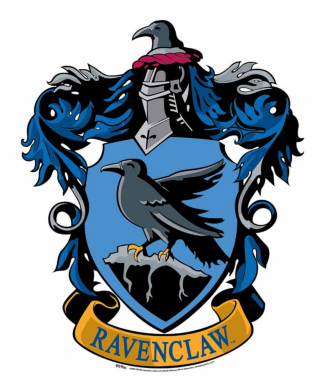

Mustufa


In [ ]:
name = "Mustufa"
houses = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']  # List of house labels
sample_df = result_df

visualize_house_prediction(name, result_df, model, houses)